In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Example with additional parameters
circular_path = pd.read_csv('circular_path_data.csv', delimiter=',', encoding='utf-8', header=0)
pioneer_odom = pd.read_csv('pioneer_odom.csv', delimiter=',', encoding='utf-8', header=0)
obstacle_odom = pd.read_csv('obstacle_odom.csv', delimiter=',', encoding='utf-8', header=0)
obstacle_detection_pioneer = pd.read_csv('obstacle_detection_pioneer.csv', delimiter=',', encoding='utf-8', header=0)

In [15]:
obstacle_detection_pioneer.head()

,Time,X til,X_robot_solver,Y_robot_solver,X_solver_robot,Y_solver_robot,X_robot_obs,Y_robot_obs,X_obs_robot,Y_obs_robot,X_dot,Y_dot
0,1.688490e+09,0.575708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1.688490e+09,0.580729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1.688490e+09,0.585808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1.688490e+09,0.588360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,1.688490e+09,0.590859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [16]:
circular_path.head()

,Time,X,Y,VX,VY
0,1.688490e+09,1.000000,0.000001,-1.882380e-07,0.157080
1,1.688490e+09,0.999997,0.002614,-4.106679e-04,0.157079
2,1.688490e+09,0.999986,0.005235,-8.223154e-04,0.157077
3,1.688490e+09,0.999969,0.007858,-1.234357e-03,0.157075
4,1.688490e+09,0.999945,0.010473,-1.645038e-03,0.157071


In [17]:
pioneer_odom.head()

,Time,X,Y,X_controle,Y_controle,W,Xd,Yd,Wd
0,1.688490e+09,0.760892,-0.659904,0.860972,-0.548172,0.840347,0.000000,0.000000,0.000000
1,1.688490e+09,0.760836,-0.659912,0.860923,-0.548186,0.840290,-0.003328,-0.000504,-0.003397
2,1.688490e+09,0.760887,-0.659938,0.860981,-0.548219,0.840226,0.003032,-0.001566,-0.003846
3,1.688490e+09,0.760914,-0.659879,0.860997,-0.548150,0.840329,0.001646,0.003546,0.006171
4,1.688490e+09,0.760770,-0.659041,0.860874,-0.547330,0.840143,-0.008585,0.050139,-0.011120


In [18]:
circular_path.head() 

,Time,X,Y,VX,VY
0,1.688490e+09,1.000000,0.000001,-1.882380e-07,0.157080
1,1.688490e+09,0.999997,0.002614,-4.106679e-04,0.157079
2,1.688490e+09,0.999986,0.005235,-8.223154e-04,0.157077
3,1.688490e+09,0.999969,0.007858,-1.234357e-03,0.157075
4,1.688490e+09,0.999945,0.010473,-1.645038e-03,0.157071


In [19]:
pioneer_odom.head()

,Time,X,Y,X_controle,Y_controle,W,Xd,Yd,Wd
0,1.688490e+09,0.760892,-0.659904,0.860972,-0.548172,0.840347,0.000000,0.000000,0.000000
1,1.688490e+09,0.760836,-0.659912,0.860923,-0.548186,0.840290,-0.003328,-0.000504,-0.003397
2,1.688490e+09,0.760887,-0.659938,0.860981,-0.548219,0.840226,0.003032,-0.001566,-0.003846
3,1.688490e+09,0.760914,-0.659879,0.860997,-0.548150,0.840329,0.001646,0.003546,0.006171
4,1.688490e+09,0.760770,-0.659041,0.860874,-0.547330,0.840143,-0.008585,0.050139,-0.011120


In [20]:
def rotation_matrix(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    rotation = np.array([[cos_theta, -sin_theta, 0],
                         [sin_theta, cos_theta, 0],
                         [0, 0, 1]])

    return rotation

In [21]:
robot_heigth = 0.7/2
robot_width = 0.6/2

thetas = np.linspace(0, 2 * np.pi, 10)
x = robot_heigth * np.cos(thetas)
y = robot_width * np.sin(thetas)

pioneer = np.array([x, y, np.ones(len(x))])

rot_pioneer = np.dot(pioneer.T, rotation_matrix(pioneer_odom.iloc[0]['W']))
rot_pioneer_x = rot_pioneer[:, 0] + pioneer_odom.iloc[0]['X']
rot_pioneer_y = rot_pioneer[:, 1] + pioneer_odom.iloc[0]['Y']

(-1.1740625738196098,
 1.190917460347293,
 -1.1107983714021188,
 1.1631493806059954)

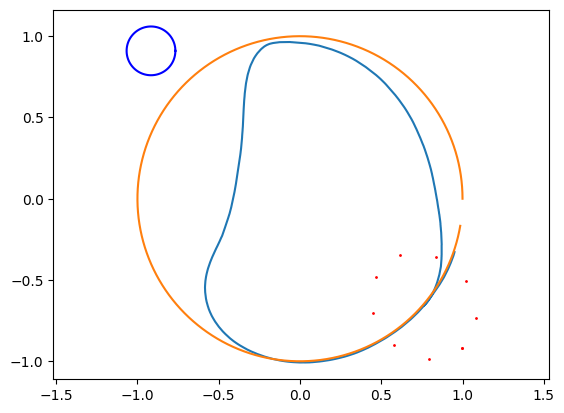

In [22]:
plt.plot(pioneer_odom['X'], pioneer_odom['Y'])
plt.plot(circular_path['X'], circular_path['Y'])
plt.scatter(rot_pioneer_x, rot_pioneer_y, s=1, c='r')
theta = np.linspace(0, 2 * np.pi, 100)
radius = 0.3/2
x = radius * np.cos(theta)
y = radius * np.sin(theta)

# Plot the circle
plt.plot(x-0.916639, y+0.909807, color='b')
plt.axis('equal')

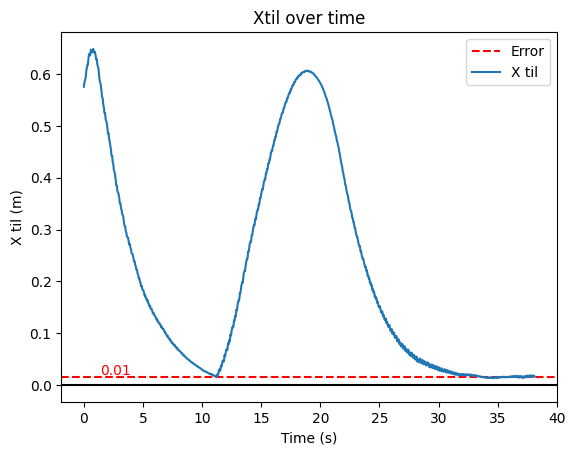

In [27]:
plt.axhline(y=0.015, color='r', linestyle='--', label='Error')
plt.axhline(y=0.0, color='k')

obstacle_detection_pioneer['Elapsed Time'] = obstacle_detection_pioneer['Time'] - obstacle_detection_pioneer['Time'].iloc[0]

half_experiment = int(len(obstacle_detection_pioneer))
plt.plot(obstacle_detection_pioneer['Elapsed Time'][:half_experiment], obstacle_detection_pioneer['X til'][:half_experiment], label='X til')

# Add x and y axis labels
plt.xlabel('Time (s)')
plt.ylabel('X til (m)')

plt.title('Xtil over time')
plt.text(4, 0.02, '0.01', color='r', ha='right')
# Add legend
plt.legend()

plt.show()